In [2]:
import math
import numpy as np
import pandas as pd
import h5py
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.math import confusion_matrix
import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras import  layers, models
from keras.layers import Dense, Flatten, Flatten, BatchNormalization, Activation, Dropout
import seaborn as sns
from sklearn.metrics import f1_score

In [3]:
# Loading the dataset
train_dataset = h5py.File('train_signs.h5', "r") #provide proper path
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

test_dataset = h5py.File('test_signs.h5', "r")  #provide proper path
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

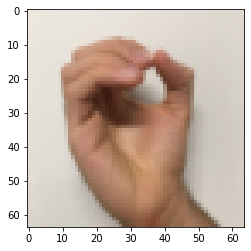

In [4]:
plt.imshow(train_set_x_orig[1], interpolation='nearest')
plt.show()

In [5]:
X_train = train_set_x_orig / 255.0
X_test = test_set_x_orig / 255.0

In [6]:
# add your model here

model = models.Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256, activation='relu'),

    Dense(128, activation='relu'),

    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 32)        0

In [7]:
model.fit(X_train, train_set_y_orig, epochs=25,
       validation_data= (X_test,test_set_y_orig))

Epoch 1/25
34/34 [==============================] - 6s 166ms/step - loss: 1.4322 - accuracy: 0.4963 - val_loss: 1.7888 - val_accuracy: 0.1667
Epoch 2/25
34/34 [==============================] - 5s 153ms/step - loss: 0.3942 - accuracy: 0.8639 - val_loss: 1.7908 - val_accuracy: 0.1667
Epoch 3/25
34/34 [==============================] - 4s 130ms/step - loss: 0.0959 - accuracy: 0.9796 - val_loss: 1.7911 - val_accuracy: 0.1667
Epoch 4/25
34/34 [==============================] - 5s 152ms/step - loss: 0.0297 - accuracy: 0.9972 - val_loss: 1.7925 - val_accuracy: 0.1667
Epoch 5/25
34/34 [==============================] - 5s 153ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.7923 - val_accuracy: 0.1583
Epoch 6/25
34/34 [==============================] - 5s 134ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.7918 - val_accuracy: 0.1833
Epoch 7/25
34/34 [==============================] - 5s 150ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.7843 - val_accuracy: 0.2583
Epoch 

In [8]:
loss, acc = model.evaluate(X_test,test_set_y_orig)
print('Test Accuracy:', acc)

4/4 [==============================] - 0s 14ms/step - loss: 0.1483 - accuracy: 0.9250
Test Accuracy: 0.925000011920929


In [9]:
#saving the model

model.save('model_cnn.h5')

In [10]:
#load saved model

loaded_model = models.load_model('model_cnn.h5')

In [11]:
y_pred = model.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])

Text(69.0, 0.5, 'Truth')

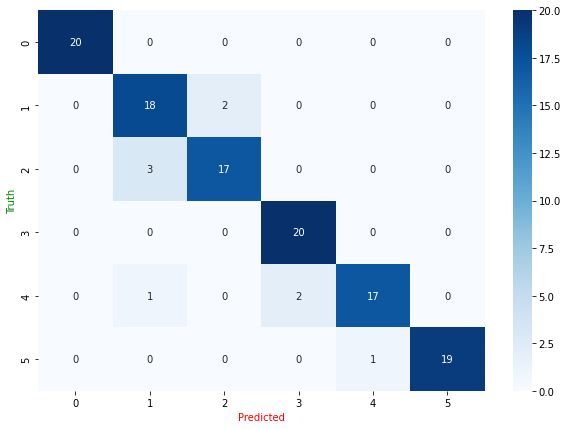

In [12]:
cm = confusion_matrix(test_set_y_orig, y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', color='r')
plt.ylabel('Truth',color='g')

In [17]:
f1_score(test_set_y_orig, y_predicted_labels, average='macro')

0.9250690829638198